# DS-SF-25 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
df.shape

(400, 4)

Answer:

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [7]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [8]:
df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

Answer:Variance is standard deviation square. So a value 115 is squared.

> ### Question 4.  Drop data points with missing data.

In [40]:
df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [31]:
#df.applymap(np.isreal).admit.unique 
#df.applymap(np.isreal).gre.unique 
#df.applymap(np.isreal).gpa.unique 
df.applymap(np.isreal).prestige.unique 


<bound method Series.unique of 0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Name: prestige, dtype: bool>

Answer:

> ### Question 6.  Create boxplots for `gre` and `gpa`.

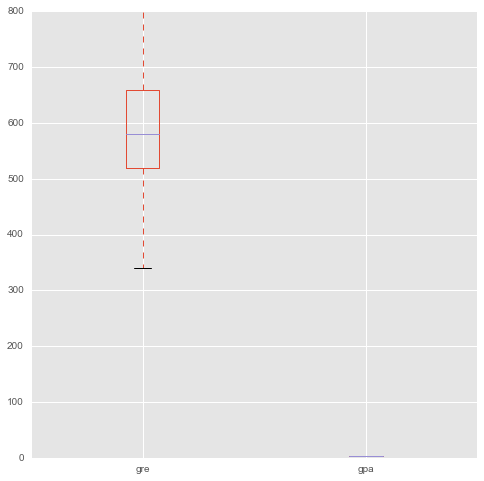

In [32]:
df[ ['gre', 'gpa'] ].plot(kind = 'box', figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer:gpa has a very low mean compared to gre. 

> ### Question 8.  Plot the distribution of each variable.

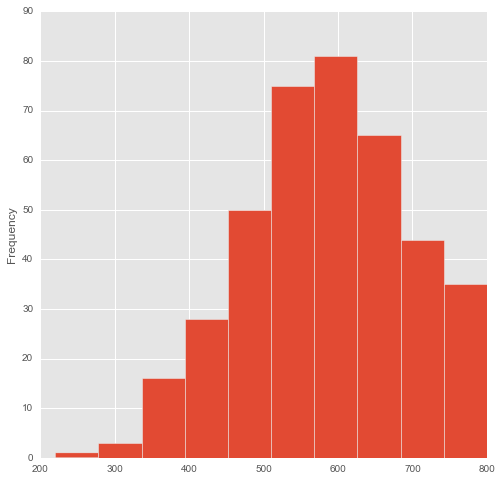

In [34]:
df.gre.plot(kind = 'hist', figsize = (8, 8))


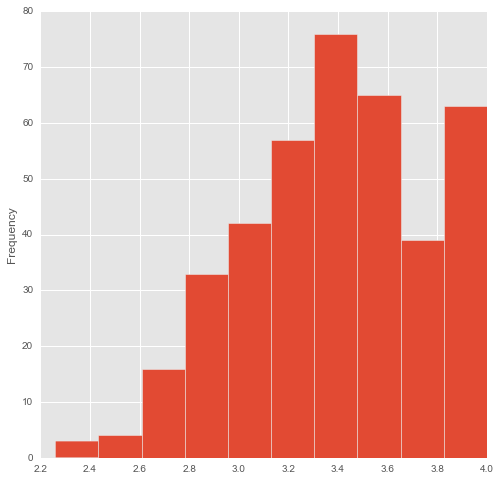

In [35]:
df.gpa.plot(kind = 'hist', figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

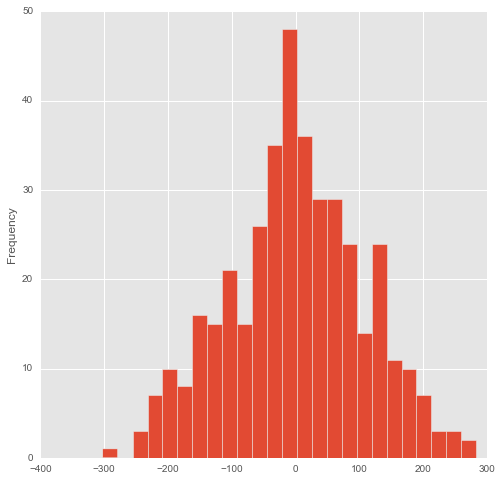

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()

model.resid.plot(kind = 'hist', bins = 25, figsize = (8, 8))

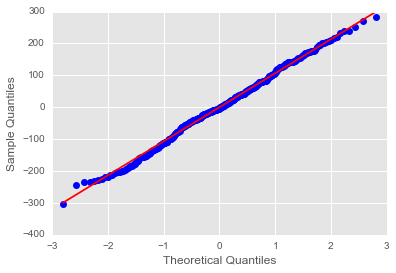

In [50]:
sm.qqplot(model.resid, line = 's')

pass

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [52]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer:gre and gpa are a bit correlated

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Model admission ~ gre+ gpa + prestige

> ### Question 13.  What is your hypothesis?

Answer: Model admission ~ gre+ gpa + prestige